In [ ]:
!pip install selenium 

     |████████████████████████████████| 958 kB 29.7 MB/s 
     |████████████████████████████████| 138 kB 56.7 MB/s 
     |████████████████████████████████| 356 kB 60.1 MB/s 
     |████████████████████████████████| 3.6 MB 57.3 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


**Importing some useful libraries---------------------------------------------**

In [ ]:
import pandas as pd # la manipulation et l'analyse des données
import numpy as np #tableau et matrice multidimensionnels

import seaborn as sns #interface de haut niveau pour dessiner des graphiques statistiques attrayants et informatifs
import matplotlib.pyplot as plt  # Il fournit une API orientée objet pour intégrer des tracés dans des applications
%matplotlib inline 
import time #heure de calcul

from sklearn.linear_model import LogisticRegression #algo utilisé pour prédire le bien ou le mal
from sklearn.naive_bayes import MultinomialNB #algo nlp utiliser pour prédire bon ou mauvais

from sklearn.model_selection import train_test_split #fractionnement des données entre l'entité et la cible
from sklearn.metrics import classification_report # donne un rapport complet sur les métriques
from sklearn.metrics import confusion_matrix # donne des informations sur le réel et prédit
from nltk.tokenize import RegexpTokenizer # les tokenizers d'expression régulière utilisent pour séparer les mots du texte
from nltk.stem.snowball import SnowballStemmer # mots souches
from sklearn.feature_extraction.text import CountVectorizer # créer une matrice clairsemée de mots en utilisant regexptokenizes
from sklearn.pipeline import make_pipeline # utilisation pour combiner tous les préprocesseurs techniuqes et algos

from PIL import Image # obtenir des images dans le bloc-notes
from bs4 import BeautifulSoup # utiliser pour extraire les données du site Web
from selenium import webdriver # utiliser pour l'automatisation du chrome
import networkx as nx # pour la création, la manipulation et l'étude de la structure, de la dynamique et des fonctions de réseaux complexes.

import pickleshare # utiliser pour vider le modèle

import warnings 
warnings.filterwarnings('ignore')

**Loading the main dataset**

In [ ]:
phish_data = pd.read_csv('/content/phishing_site_urls.csv')

In [ ]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [ ]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [ ]:
phish_data.sample(5)

,URL,Label
238963,shop.nick.com/category/48046660381/1/Blues-Clu...,good
98660,cherrygrovewheredidthesummergo.com/js/up/fag/8...,bad
195249,groups.yahoo.com/group/russian_language/messag...,good
473757,youtube.com/watch?v=OB2bpNQY0Oo,good
243391,stinkylulu.blogspot.com/2007/11/jo-van-fleet-i...,good


In [ ]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [ ]:
phish_data.isnull().sum()

URL      0
Label    0
dtype: int64

In [ ]:
label_counts = pd.DataFrame(phish_data.Label.value_counts())

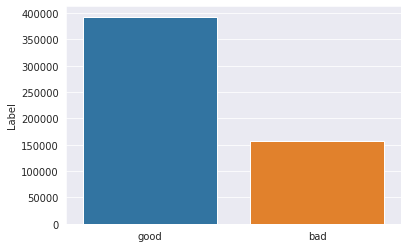

In [ ]:
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

**Preprocessing---------------------------------------------------------------**

In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [ ]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [ ]:
tokenizer.tokenize(phish_data.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [ ]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.376005387999612 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized
254532,valuethiswebsite.com/www.yoopa.ca,good,"[valuethiswebsite, com, www, yoopa, ca]"
47600,service.confirm.paypal.cmd.cgi-bin.2466sd4f3e6...,bad,"[service, confirm, paypal, cmd, cgi, bin, sd, ..."
272221,allmusic.com/explore/style/riot-grrrl-d2779,good,"[allmusic, com, explore, style, riot, grrrl, d]"
357787,imdb.com/name/nm0001848/,good,"[imdb, com, name, nm]"
199301,icehockey.wikia.com/wiki/J._J._Daigneault,good,"[icehockey, wikia, com, wiki, J, J, Daigneault]"


In [ ]:
stemmer = SnowballStemmer("english") 

In [ ]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 54.49844502899987 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
209256,locator.goodwill.org/,good,"[locator, goodwill, org]","[locat, goodwil, org]"
539385,computerhome.lu/87yfhc,bad,"[computerhome, lu, yfhc]","[computerhom, lu, yfhc]"
95569,www.level80.co.uk/psblood.htm,good,"[www, level, co, uk, psblood, htm]","[www, level, co, uk, psblood, htm]"
378965,locatetv.com/movie/too-rich-the-secret-life-of...,good,"[locatetv, com, movie, too, rich, the, secret,...","[locatetv, com, movi, too, rich, the, secret, ..."
406396,northerntool.com/shop/tools/product_200436506_...,good,"[northerntool, com, shop, tools, product, cm, ...","[northerntool, com, shop, tool, product, cm, v..."


In [ ]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.2785677250003573 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
277539,amazon.com/Topps-Baseball-Nixon-Montreal-Expos...,good,"[amazon, com, Topps, Baseball, Nixon, Montreal...","[amazon, com, topp, basebal, nixon, montreal, ...",amazon com topp basebal nixon montreal expo dp...
37754,'paypal.us.login.account.confirmed.verfiyed.cg...,bad,"[paypal, us, login, account, confirmed, verfiy...","[paypal, us, login, account, confirm, verfiy, ...",paypal us login account confirm verfiy cgi bin...
380918,lyricsmode.com/lyrics/n/nirvana/baba_o_riley.html,good,"[lyricsmode, com, lyrics, n, nirvana, baba, o,...","[lyricsmod, com, lyric, n, nirvana, baba, o, r...",lyricsmod com lyric n nirvana baba o riley html
230155,pktube.onepakistan.com/heavy+metal+music/,good,"[pktube, onepakistan, com, heavy, metal, music]","[pktube, onepakistan, com, heavi, metal, music]",pktube onepakistan com heavi metal music
308084,columbiatribune.com/news/2010/oct/15/sean-heng...,good,"[columbiatribune, com, news, oct, sean, hengel...","[columbiatribun, com, news, oct, sean, hengel,...",columbiatribun com news oct sean hengel obituari


In [ ]:
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [ ]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [ ]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [ ]:
cv = CountVectorizer()

In [ ]:
feature = cv.fit_transform(phish_data.text_sent) 


****LogisticRegression---------------------------------------------------------**

In [ ]:
feature[:5].toarray() 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [ ]:
# create lr object
lr = LogisticRegression()

In [ ]:
lr.fit(trainX,trainY)

LogisticRegression()

In [ ]:
lr.score(testX,testY)

0.9646999716026999

In [ ]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

In [ ]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())


In [ ]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [ ]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>)),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipeline_ls.score(testX,testY)

0.9664038096070251

In [ ]:
import pickle
pickle.dump(pipeline_ls,open('/content/ph.pkl','wb'))

In [ ]:
loaded_model = pickle.load(open('/content/ph.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)


0.9664038096070251


In [ ]:
predict_bad = ['tubemoviez.exe','https://www.facebook.com','youtube.com/','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('ph.pkl', 'rb'))
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'good' 'good' 'bad']
******************************
['good' 'good' 'good']
